In [0]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [2]:
#--------------------Run this cell to mount your Google Drive-------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Reading the file from Google Drive

data = pd.read_excel("/content/drive/My Drive/ER/Forecasting/CocaCola_Sales_Rawdata.xlsx")
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [0]:
sns.set_style(style = "whitegrid")

In [59]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [0]:
def case_q1(i):
  data["Month"].iloc[i] = 3
  data["Day"].iloc[i] = 31
  
def case_q2(i):
  data["Month"].iloc[i] = 6
  data["Day"].iloc[i] = 30

def case_q3(i):
  data["Month"].iloc[i] = 9
  data["Day"].iloc[i] = 30

def case_q4(i):
  data["Month"].iloc[i] = 12
  data["Day"].iloc[i] = 31

def switch(para, i):
  switcher = {
      'q1': case_q1,
      'q2': case_q2,
      'q3': case_q3,
      'q4': case_q4,
  }
  
  switcher.get(para, "Not a Valid Input")(i)

In [61]:
data["Year"] = ""
data["Month"] = ""
data["Day"] = ""
for i in range(0,len(data)):
  data["Year"].iloc[i] = int('19'+(str(data["Quarter"][i][3:5])))
  switch(str(data["Quarter"][i][0:2]).lower(), i)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
data.head(20)

,Quarter,Sales,Year,Month,Day
0,Q1_86,1734.827000,1986,3,31
1,Q2_86,2244.960999,1986,6,30
2,Q3_86,2533.804993,1986,9,30
3,Q4_86,2154.962997,1986,12,31
4,Q1_87,1547.818996,1987,3,31
5,Q2_87,2104.411995,1987,6,30
6,Q3_87,2014.362999,1987,9,30
7,Q4_87,1991.746998,1987,12,31
8,Q1_88,1869.049999,1988,3,31
9,Q2_88,2313.631996,1988,6,30


In [0]:
data["Time"] = pd.to_datetime(data[["Year", "Month", "Day"]])
data.drop(labels = ["Quarter","Year", "Month", "Day"], axis = 1, inplace = True)

In [64]:
data.head()

,Sales,Time
0,1734.827000,1986-03-31
1,2244.960999,1986-06-30
2,2533.804993,1986-09-30
3,2154.962997,1986-12-31
4,1547.818996,1987-03-31


In [0]:
data = data[["Time", "Sales"]]

In [66]:
data.head(20)

,Time,Sales
0,1986-03-31,1734.827000
1,1986-06-30,2244.960999
2,1986-09-30,2533.804993
3,1986-12-31,2154.962997
4,1987-03-31,1547.818996
5,1987-06-30,2104.411995
6,1987-09-30,2014.362999
7,1987-12-31,1991.746998
8,1988-03-31,1869.049999
9,1988-06-30,2313.631996


In [0]:
data.set_index(["Time"], inplace = True)

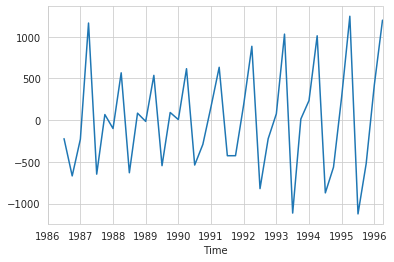

In [68]:
data["Sales"].diff().diff().plot()

In [0]:
log_sales = np.log(data["Sales"])
squareroot_sales = np.sqrt(data["Sales"])

In [0]:
data["Log_Sales"] = log_sales
data["Sqrt_Sales"] = squareroot_sales

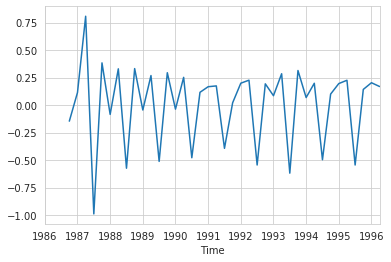

In [71]:
data["Log_Sales"].diff().diff().diff().plot(y = ["Sqrt_Sales"])

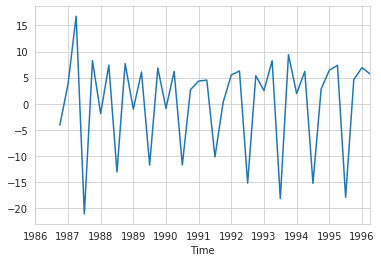

In [72]:
data["Sqrt_Sales"].diff().diff().diff().plot(y = ["Sqrt_Sales"])

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

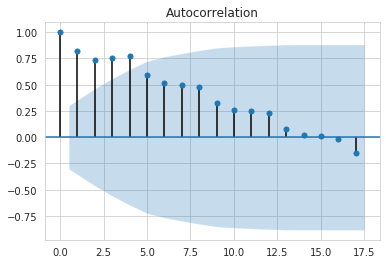

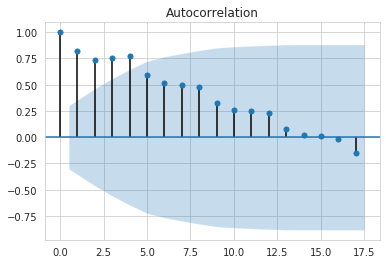

In [74]:
plot_acf(x = data["Log_Sales"])

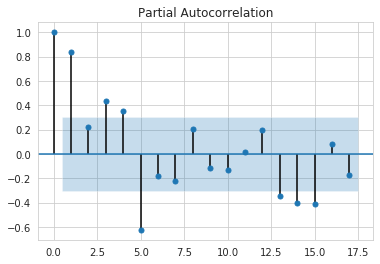

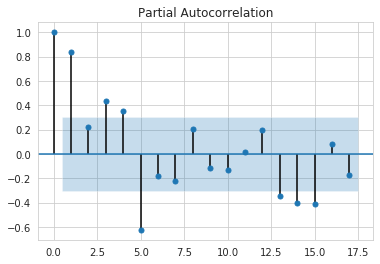

In [75]:
plot_pacf(x = data["Log_Sales"])

In [0]:
#Q -  5, p = 2, d - 0 to 2

In [0]:
#Dickey Fuller Test for data["Log_Sales_3_back"]
data["Log_Sales_3_back"] = data["Log_Sales"].diff().diff().diff()
data["Log_Sales_3_back"].dropna(inplace = True)

ADF = adfuller(data["Log_Sales_3_back"])

In [0]:
#Null Hypothesis - The given Series is Non Stationary
#Alternate Hypothesis -  The given Series is Stationary.

In [79]:
ADF

(-7.851430697837628,
 5.587635443210607e-12,
 3,
 35,
 {'1%': -3.6327426647230316,
  '10%': -2.6130173469387756,
  '5%': -2.9485102040816327},
 -83.90595919125009)

In [80]:
print("ADF Statistic:", ADF[0])
print("P- Value:", ADF[1])
print("Critical Values:")
print("\t 5% :", ADF[4]["5%"])
print("\t 1% :", ADF[4]["1%"])
print("\t 10% :", ADF[4]["10%"])

#Since the P value is less than 0.05 and ADF Statistic is lesser than 1% Critical Value, We can reject the Null Hypothesis
#and accept the Alternate Hypothesis.

ADF Statistic: -7.851430697837628
P- Value: 5.587635443210607e-12
Critical Values:
	 5% : -2.9485102040816327
	 1% : -3.6327426647230316
	 10% : -2.6130173469387756


In [0]:
data.head()
data.dropna(inplace = True)

In [82]:
data.head()

,Sales,Log_Sales,Sqrt_Sales,Log_Sales_3_back
Time,,,,
1986-12-31,2154.962997,7.675529,46.421579,-0.146236
1987-03-31,1547.818996,7.344602,39.342331,0.114004
1987-06-30,2104.411995,7.651791,45.873871,0.807094
1987-09-30,2014.362999,7.608058,44.881655,-0.989038
1987-12-31,1991.746998,7.596767,44.628993,0.383365


In [0]:
#Train_Test Split
data_train = data.iloc[0:round(len(data) * 0.75)+1]
data_test = data.iloc[30: len(data)-1]

In [84]:
data_train.head()

,Sales,Log_Sales,Sqrt_Sales,Log_Sales_3_back
Time,,,,
1986-12-31,2154.962997,7.675529,46.421579,-0.146236
1987-03-31,1547.818996,7.344602,39.342331,0.114004
1987-06-30,2104.411995,7.651791,45.873871,0.807094
1987-09-30,2014.362999,7.608058,44.881655,-0.989038
1987-12-31,1991.746998,7.596767,44.628993,0.383365


In [85]:
#ARIMA Modelling

ar = ARIMA(data_train["Log_Sales_3_back"], order = (2,0,2))
ar_model = ar.fit()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


In [86]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       Log_Sales_3_back   No. Observations:                   30
Model:                     ARMA(2, 2)   Log Likelihood                  13.988
Method:                       css-mle   S.D. of innovations              0.124
Date:                Tue, 03 Mar 2020   AIC                            -15.976
Time:                        06:25:38   BIC                             -7.568
Sample:                    12-31-1986   HQIC                           -13.286
                         - 03-31-1994                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0004      0.000     -1.089      0.287      -0.001       0.000
ar.L1.Log_Sales_3_back    -0.3525      0.167     -2.108      0.045      -0.680      -0.025
ar.L2.Log_Sales_3_back    -0.5529      0.162     -3.404      0.002      -0.871      -0.235
ma.L1.Log_Sales_3_back    -1.9723      0.137    -14.353      0.000      -2.242      -1.703
ma.L2.Log_Sales_3_back     0.9987      0.134      7.446      0.000       0.736       1.262
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3188           -1.3065j            1.3448           -0.2881
AR.2           -0.3188           +1.3065j            1.3448            0.2881
MA.1            0.9874           -0.1623j            1.0006           -0.0259
MA.2            0.9874           +0.1623j            1.0006            0.0259
-----------------------------------------------------------------------------
"""

In [87]:
#Calculating MSE
ar_predict = ar_model.forecast(steps = 8)[0]  #Predicting for next 8 periods.
mse = (((ar_predict - data_test["Log_Sales_3_back"])**2).sum())/8

print("Mean Squared Error: ", mse)

Mean Squared Error:  0.07575210233415446
